In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from utilities import load_data

In [3]:
X_train, y_train, X_test, y_test = load_data()

In [4]:
print(f"X_train shape : {X_train.shape}\ny_train shape : {y_train.shape}")

X_train shape : (1000, 64, 64)
y_train shape : (1000, 1)


In [5]:
print(f"X_train shape : {X_test.shape}\ny_train shape : {y_test.shape}")

X_train shape : (200, 64, 64)
y_train shape : (200, 1)


c:\Users\ghsts\Documents\DeepLearning\.dlenv\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


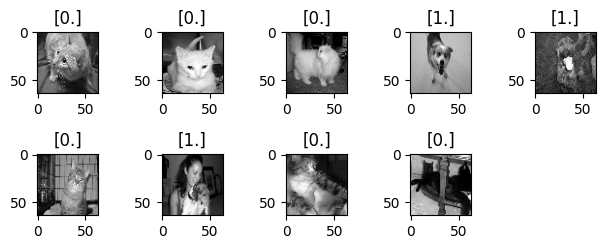

In [6]:
plt.figure()
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [7]:
X_train[0].shape

(64, 64)

In [8]:
def Normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [9]:
X_train = X_train.astype('float16')
for i in range(0, X_train.shape[0]):
    X_train[i] = Normalize(X_train[i])

X_train

array([[[0.648  , 0.6885 , 0.6436 , ..., 0.567  , 0.514  , 0.5264 ],
        [0.6396 , 0.6885 , 0.7207 , ..., 0.563  , 0.567  , 0.502  ],
        [0.6235 , 0.668  , 0.7407 , ..., 0.6235 , 0.563  , 0.595  ],
        ...,
        [0.6924 , 0.664  , 0.656  , ..., 0.3523 , 0.6963 , 0.684  ],
        [0.66   , 0.656  , 0.656  , ..., 0.166  , 0.7285 , 0.4858 ],
        [0.6963 , 0.68   , 0.664  , ..., 0.336  , 0.7124 , 0.1417 ]],

       [[0.1409 , 0.1455 , 0.1273 , ..., 0.1637 , 0.159  , 0.1409 ],
        [0.12274, 0.15   , 0.1409 , ..., 0.1318 , 0.1637 , 0.1409 ],
        [0.1545 , 0.159  , 0.11365, ..., 0.1455 , 0.1318 , 0.12274],
        ...,
        [0.3455 , 0.3364 , 0.268  , ..., 0.291  , 0.3044 , 0.3228 ],
        [0.268  , 0.268  , 0.2727 , ..., 0.1864 , 0.2546 , 0.259  ],
        [0.241  , 0.2273 , 0.2228 , ..., 0.2    , 0.1864 , 0.2    ]],

       [[0.092  , 0.088  , 0.1    , ..., 0.32   , 0.312  , 0.32   ],
        [0.1    , 0.092  , 0.096  , ..., 0.34   , 0.336  , 0.34   ],
    

In [10]:
X_test = X_test.astype('float16')
for i in range(0, X_test.shape[0]):
    X_test[i] = Normalize(X_test[i])

X_test

array([[[0.1887 , 0.1887 , 0.2048 , ..., 0.1847 , 0.2089 , 0.2129 ],
        [0.2089 , 0.2048 , 0.2129 , ..., 0.2169 , 0.2169 , 0.2208 ],
        [0.2208 , 0.2208 , 0.2289 , ..., 0.241  , 0.2208 , 0.2289 ],
        ...,
        [0.5303 , 0.5303 , 0.574  , ..., 0.6187 , 0.6104 , 0.6226 ],
        [0.5464 , 0.5464 , 0.518  , ..., 0.6187 , 0.6226 , 0.6104 ],
        [0.506  , 0.534  , 0.542  , ..., 0.6226 , 0.6265 , 0.6187 ]],

       [[0.5264 , 0.6    , 0.5063 , ..., 0.4448 , 0.1877 , 0.4    ],
        [0.3142 , 0.4204 , 0.4368 , ..., 0.457  , 0.1959 , 0.4326 ],
        [0.5225 , 0.5635 , 0.4817 , ..., 0.4695 , 0.2081 , 0.4448 ],
        ...,
        [0.01633, 0.01633, 0.00816, ..., 0.498  , 0.3591 , 0.4817 ],
        [0.01633, 0.0204 , 0.00816, ..., 0.4897 , 0.3389 , 0.4856 ],
        [0.01633, 0.00816, 0.00816, ..., 0.4612 , 0.3103 , 0.4734 ]],

       [[0.8486 , 0.518  , 0.7847 , ..., 0.992  , 0.992  , 0.992  ],
        [0.6094 , 0.9165 , 0.733  , ..., 0.992  , 0.992  , 0.992  ],
    

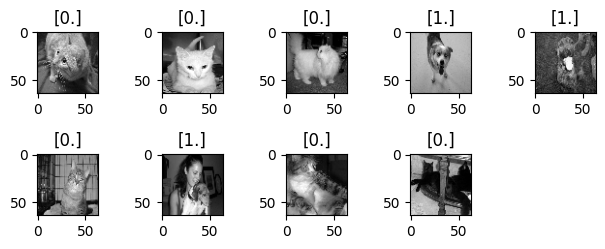

In [11]:
plt.figure()
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [12]:
X_train = X_train.reshape(1000, 4096)
X_test = X_test.reshape(200, 4096)

In [13]:
print(f"X_train shape : {X_train.shape}\nX_test shape : {X_test.shape}")

X_train shape : (1000, 4096)
X_test shape : (200, 4096)


In [14]:
def initialize(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [15]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1+np.exp(-Z))
    return A

In [16]:
def log_loss(A, y):
    eps = 1e-15
    return -1/y.shape[0] * np.sum(y*np.log(A + eps) + (1-y)*np.log(1-A + eps))

In [17]:
def gradients(A, X, y):
    dW = 1/y.shape[0] * X.T.dot(A - y)
    db = 1/y.shape[0] * np.sum(A - y)
    return (dW, db)

In [18]:
def gradient_descent(W, b, dW, db, alpha):
    W = W - alpha*dW
    b = b - alpha*db
    return (W, b)

In [19]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [20]:
from tqdm import tqdm

In [21]:
from sklearn.metrics import accuracy_score

def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.1, n_iter=100):
    W, b = initialize(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)): 
        A = model(X_train, W, b) 

        #to make the calculations faster, we'll calculate the loss and score each time we have a multiple of 10
        if i%10 == 0:
            #Train
            train_loss.append(log_loss(A, y_train))
            y_pred_train = predict(X_train, W, b) 
            train_acc.append(accuracy_score(y_train, y_pred_train))

            #Test
            A_test = model(X_test, W, b) 
            test_loss.append(log_loss(A_test, y_test))
            y_pred_test = predict(X_test, W, b) 
            test_acc.append(accuracy_score(y_test, y_pred_test))


        #updating our parameters
        dW, db = gradients(A, X_train, y_train)
        W, b = gradient_descent(W, b, dW, db, learning_rate)

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="train loss")
    plt.plot(test_loss, label="test loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train accuracy")
    plt.plot(test_acc, label="test accuracy")
    plt.legend()
    plt.show()

    y_pred = predict(X_test, W, b) 
    print("Final accuracy : ", accuracy_score(y_pred, y_test))

    return (W, b)

100%|██████████| 10000/10000 [08:21<00:00, 19.96it/s]


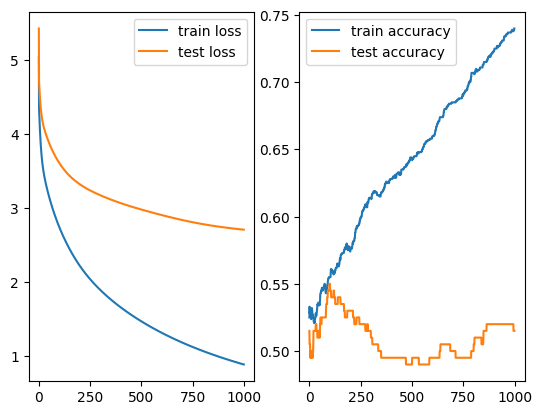

Final accuracy :  0.515


In [24]:
W, b = artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.01, n_iter=10000)

In [27]:
#We notice there is a big difference between train loss and test loss, and between the train accuracy and test accuracy which can mean we have a case of overfitting
#We also have a big difference between the 1000 images and the 4096 variables which creates a "Curse of dimensionality" where the model can get lost
#We can provide more images for more accurate results

#But to really fix this problem we have to add more neurons to create a neural network